# Aprendizaje Supervisado con Python: Regresión
----

## Agenda

1- Introducción
* Comunidad de Analítica y temas tratados en el 2017
* Recursos en Github
* Aprendizaje supervisado
* Regresión lineal clásica
* Regresión lineal regularizada
    + LASSO
    + Ridge
    + Elastic Net  
<br>

2- Caso de estudio y exploración de los datos 
* Caso de estudio
* Pregunta y problemática de negocio
* Contenido y estructura de los datos
<br>

3- Procesamiento y limpieza de los datos
* Limpieza preliminar
* Tratamiento de valores extremos
* Normalización de la variable objetivo  
<br>

4- Ingeniería de características
* Imputación de valores perdidos
* Transformación de variables
* Codificación de etiquetas (clases)
* Normalización
* Variables ficticias (dummies)  
<br>

5- Modelado, evaluación y predicción
* Regresión lineal clásica
* Regresión lineal regularizada
    + LASSO
    + Ridge
    + Elastic Net

## Comunidad de Analítica y temas tratados en el 2017
[Nuestra Comunidad](https://www.meetup.com/Comunidad-de-Analitica-en-Santo-Domingo-R-Python/)  
<br>
[Votación: Temas de Interés en Ciencia de Datos con Python](https://www.meetup.com/Comunidad-de-Analitica-en-Santo-Domingo-R-Python/polls/1252269/)  
<br>

## Recursos en Github

[PyRDR](https://github.com/pyrdr/charlas)

### Aprendizaje Automático Supervisado

$$\Huge Y = f(X, \varepsilon)$$

![Algoritmos de Machine Learning](figs/machine_learning_methods.png)

## Regresión

![](figs/regresion_lineal_simple.png)



### Regresión lineal clásica (estándar o gaussiana)
$$ $$
$$
\begin{align} 
\Large E(Y \hspace{0.1cm} \text{|} \hspace{0.1cm} X_i) = \beta_{0} + \beta_{1} X_{1i} + \beta_{2} X_{2i} ... + \beta_{k} X_{ki} + \varepsilon_i
\end{align}
$$
$$ $$
$$\Large \varepsilon_i \sim \large N$$


#### Supuestos:
* S01: Lineal en sus parámetros
* S02: Los regresores $X$ son fijos en muetras repetidas, es decir, no-estocásticos
* S03: Los disturbios tiene valor medio cero $E(\varepsilon_i | X_i) = 0$
* S04: Homocedasticidad: dados los valores de $X$, la varianza de los disturbios $\varepsilon_i$ es la misma para todas las observaciones: $$var(\varepsilon_i \hspace{0.1cm} \text{|} \hspace{0.1cm} X_i) = E[\varepsilon_i − E(\varepsilon_i \hspace{0.1cm} \text{|} \hspace{0.1cm} X_i)^2] = E(\varepsilon_i^2 \hspace{0.1cm} \text{|} \hspace{0.1cm} X_i ) = \sigma^2$$
* S05: No existe autocorrelación entre los disturbios. Dados dos valores de $X$, $X_i$ y $X_j$ ($i \neq j$), la correlación entre cualquier par $\varepsilon_i$ y $\varepsilon_j$ ($i \neq j$) es cero. 
* S07: El número de observaciones $n$ debe ser más grande que el número de parámetros estimados.
* S08: Variabilidad en los valores de $X$: $var(X)$ debe ser un número positivo finito.
* S09: El modelo de regresión está correctamente especificado, es decir, no existe sesgo de especificación.
* S10: No existe multicolinearidad perfecta, es decir, no existen relaciones lineales perfectas entre las variables explicativas.
* S11: Para fines de inferencia, los disturbios siguen una distribución gaussiana ó normal ($\varepsilon_i \sim N$).

* Regresión lineal clásica
* Regresión lineal regularizada
    + LASSO
    + Ridge
    + Elastic Net  

https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

# Caso de estudio y exploración de los datos 
* Caso de estudio (Kaggle)  
     + https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
     + https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset
     + https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard  
<br>
* ¿Cuál es la pregunta de negocio que debemos responder? ¿cuál es la problemática de negocios que debemos resolver?

In [1]:
# Librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy import stats
from scipy.stats import norm, skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Opciones
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

## Contenido y estructura de los datos

In [2]:
# Para verificar los archivos contenidos en el directorio
from subprocess import check_output
print(check_output(["ls", "../python_regression/"]).decode("utf8"))

data_description.txt
data_fields.txt
docs
figs
python_regression.ipynb
sample_submission.csv
test.csv
train.csv



In [3]:
# Para leer los datos
train = pd.read_csv("train.csv")
print("train : " + str(train.shape))

test = pd.read_csv('test.csv')
print("test : " + str(test.shape))

train : (1460, 81)
test : (1459, 80)


In [4]:
## Despliega las primeras cinco filas del conjunto de datos de entrenamiento
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
## Describe los datos de entrenamiento
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [6]:
# Verifica el número de observaciones y atributos
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

# Guarda la columna 'Id'
train_ID = train['Id']
test_ID = test['Id']

# Ahora prescinde de la columna 'Id', ya que es innecesaria para el proceso de predicción
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# Verifica de nuevo el tamaño de los datos después de eliminar la variable 'Id'
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


## Procesamiento de datos
### Valores extremos (outliers)
La [documentación](http://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt) de los datos de Ames Housing indica que existen valores extremos (outliers) en los datos de entrenamiento.

Vamos a explorar estos valores.

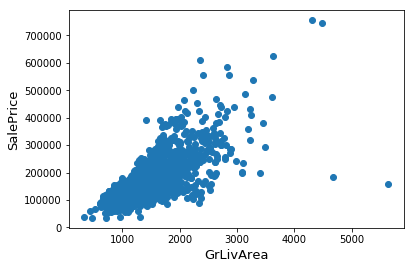

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

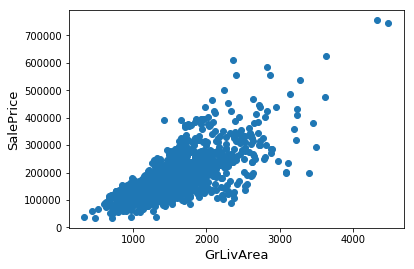

In [8]:
# Eliminamos los outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

# Verificamos de nuevo el gráfico
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### Nota :

Eliminar los valores extremos (outliers) no es siempre lo más apropiado. En nuestro caso procedimos a eliminar estos dos casos, debido a que eran valores muy elevados y que no hacían sentido (áreas extremadamente grandes a precios muy bajos).

Puede que existan otros valores extremos en los datos de entrenamiento. Sin embargo, removerlos todos puede afectar de mala manera nuestro ejercicio de modelado si también encontramos outliers en los datos de comprobación (test). Por eso, en lugar de removerlos todos, preferimos solo manejar aquellos casos que hagan nuestros modelos más robustos.

## Variable Objetivo (Target)
**SalePrice** (el precio de venta) es la variable que necesitamos predecir. Por eso realizamos algunos análisis preliminares sobre dicha variable.


 mu = 180932.92 and sigma = 79467.79



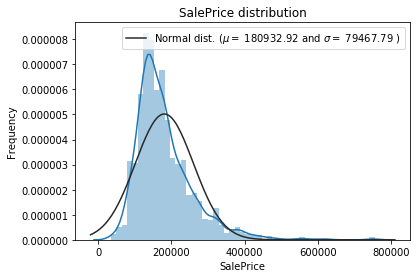

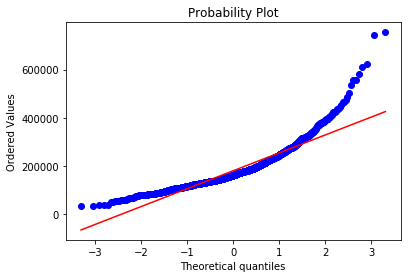

In [9]:
sns.distplot(train['SalePrice'] , fit=norm);

# Obtenemos los parámetros de ajuste utilizados por la función
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Graficamos la distribución empírica
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# QQ-plot para comprobar la normalidad
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### Transformación logarítmica de la variable objetivo


 mu = 12.02 and sigma = 0.40



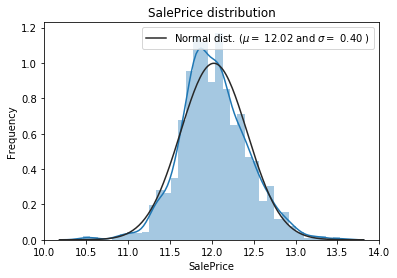

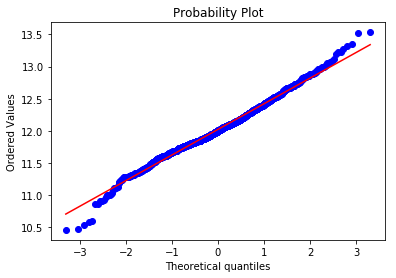

In [10]:
# Empleamos la función log1p de numpy para obtener el log(1+x) de todos los elementos de la variable objetivo
train["SalePrice"] = np.log1p(train["SalePrice"])

# Verificamos la nueva distribución empírica 
sns.distplot(train['SalePrice'] , fit=norm);

# Nuevos parámetros
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Nuevo gráfico después de la transformación
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# QQ-plot después de la transformación
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Registramos la nueva variable target como y_train
y_train = train.SalePrice.values

## Ingeniería de atributos (Features engineering)
Vamos primero a concatenar los dos data frames (train y test) a fin de simplicar el trabajo.

In [11]:
ntrain = train.shape[0]
ntest = test.shape[0]
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


## Valores perdidos (Missing data)

In [12]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(30)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


Text(0.5,1,'Percent missing data by feature')

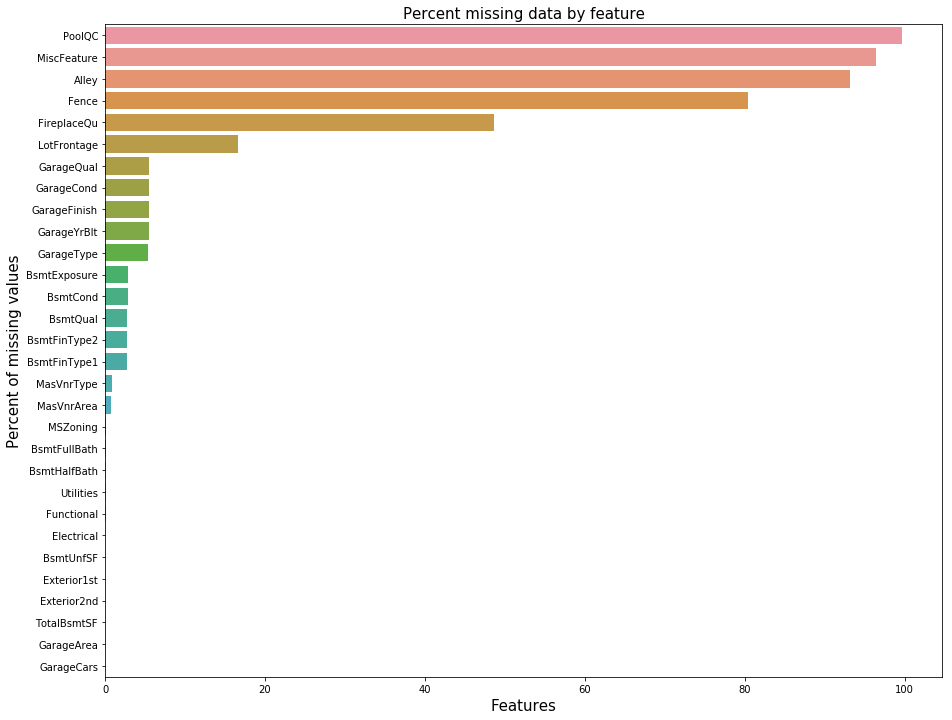

In [13]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='0')
sns.barplot(x=all_data_na, y=all_data_na.index)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Imputamos los valores perdidos según cada caso

**PoolQC** : la descripción de datos dice que NA signifca "No Pool". Esto hace sentido, dado el enorme porcentaje de valores perdidos (+99%), y el hecho de que, en general, la mayoría de las viviendas no tienen piscina.

In [14]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

Casos similares.

In [15]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

**LotFrontage** : Dado que el área de cada calle conectada a la casa, muy probablemente es similar para las otras casas del vecindario, podemos rellenar los valores perdidos con la mediana de LotFrontage del vecindario.

In [16]:
# Agrupamos por vecindario y completamos los valores perdidos con la mediana de LotFrontage para todos los vecindarios
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

**GarageYrBlt**, **GarageArea** y **GarageCars** : Reemplazamos los datos perdidos con cero, ya que "no garage" equivale a que no hay carros en dicho garage.

In [17]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

**BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**, **TotalBsmtSF**, **BsmtFullBath**, **BsmtHalfBath** : los valores perdidos muy probablemente son cero por no tener basement.

In [18]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

**BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinType1**, **BsmtFinType2** : Para todos estos atributos categóricos relacionados con el basement, NaN significa que no hay basement.

In [19]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

**MasVnrArea** y **MasVnrType** : NA muy probablemente indica que estas casas no tienen una chapa de albañilería. De manera que podemos reemplazar con cero el área y con None el tipo.

In [20]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

**MSZoning** (clasificación general de zonificación) : 'RL' es por mucho el valor más común. De manera que podemos reemplazar los valores perdidos con 'RL'.

In [21]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

**Utilities** : Para este atributo categórico todos los registros son "AllPub", excepto por uno "NoSeWa" y 2 NA. Dado que la casa con 'NoSewa' está en el juego de datos de entrenamiento, este atributo no ayudará en el modelado predictivo. Por tanto, podemos eliminarlo sin problema.

In [22]:
all_data = all_data.drop(['Utilities'], axis=1)

**Functional**: data description says NA means typical

In [23]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

**Electrical** : Tiene un valor NA. Pero este atributo en su mayoría es 'SBrkr', de manera que podemos reemplazar el valor perdido por 'SBrkr'.

In [24]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

**KitchenQual**: Sólo un valor NA, lo sustituimos por 'TA' (el más frecuente).

In [25]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

**Exterior1st** y **Exterior2nd** : De nuevo, Exterior 1 & 2 tienen un sólo valor perdido. Sustituimos por el más común.

In [26]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

**SaleType** : Rellenamos con el más frecuente ("WD")

In [27]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

**MSSubClass** : Na muy probablemente indica clase "no building", por lo que reemplazamos con None

In [28]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

**Quedan aún valores perdidos?**

In [29]:
# Verificamos si permanecen aún valores perdidos
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


Ya no quedan valores perdidos.

### Más ingeniería de atributos:

#### Transformando algunas variables numéricas que realmente son categóricas

In [30]:
# MSSubClass = El tipo de edificios
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


# OverallCond
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


# Año y mes de venta.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

#### Codifica en cifras los valores nominales de algunas variables categóricas, para un mejor desempeño
https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/

In [31]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# procesa columnas, applicando LabelEncoder a los atributos categóricos
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# Shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


#### Adicionamos un atributo muy importante

Los atributos relacionados con el área (pies cuadrados, metros cuadrados) son muy importante para determinar los precios de las casas. Vamos a añadir un atributo que equivale al área combinada del basement, más el primer piso y el segundo piso de cada casa.

In [32]:
# Adicionamos el total de pies cuadrados (TotalSF) de la vivienda
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

#### Atributos sesgados

In [33]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Verificamos el sesgo de todos los atributos numéricos
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


##### Transformación Box-Cox de atributos (altamente) sesgados.

Mediante la función $\text{boxcox1p}$ calculamos la transformación Box-Cox de $1 + x$. Debemos notar que configurar   $\lambda = 0$ es equivalente a $\text{loglp}$ usado más arriba para la variable target.
  
* http://onlinestatbook.com/2/transformations/box-cox.html  
* https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html


In [34]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
# all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


#### Variables ficticias (dummies)

In [35]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


#### Nuevos conjuntos de datos de entrenamiento y comprobación.

In [36]:
train = all_data[:ntrain]
test = all_data[ntrain:]

### Correlación de datos

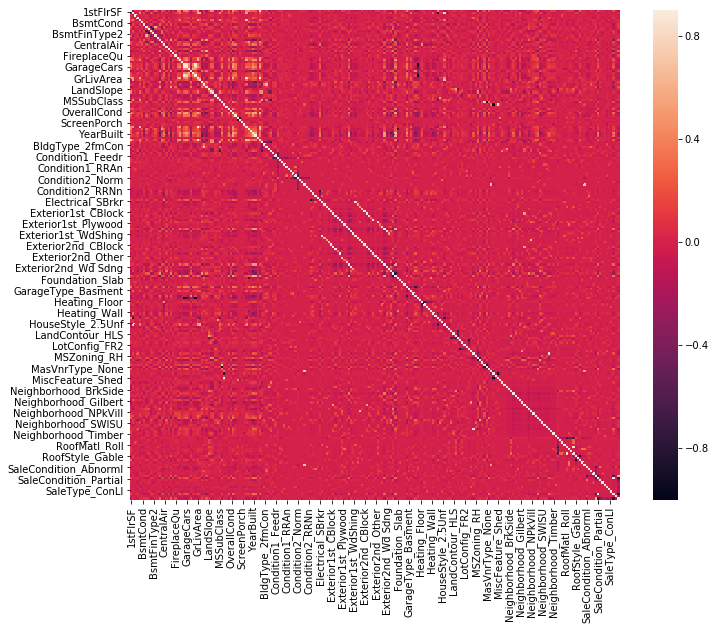

In [37]:
# Mapa para detectar qué atributos están correlacionados con el precio de venta
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Modelado


In [38]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

###  Estrategia de validación cruzada (cross-validation)

Emplearemos la función $\text{cross_val_score}$ de Sklearn. Sin embargo, esta función no tiene un atributo de mezcla aleatoria de datos. De manera que adicionamos previamente una línea de código en orden a realizar dicha mezcla.

In [39]:
# Función de validación cruzada con mezcla aleatoria previa
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Modelos
Aquellos modelos que pueden ser muy sensibles a los valores extremos (outliers), los vamos robustecer utilizando el método Robustscaler() de Sklearn en el pipeline.

**Regresión lineal (clásica)**:

In [40]:
REG = make_pipeline(RobustScaler(), LinearRegression())

**Regresión LASSO**:

In [41]:
LASSO = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

**Regresión Elastic Net**:

In [42]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

**Regresión con Kernel Ridge**:

In [43]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

## Scores de los modelos

Veamos ahora cómo estos modelos se desempeñan sobre los datos evaluando la métrica [RMSLE](https://www.quora.com/What-is-the-difference-between-an-RMSE-and-RMSLE-logarithmic-error-and-does-a-high-RMSE-imply-low-RMSLE).

[Función de Costo RMSLE](docs/rmslecostfunction-160623032122.pdf)

In [44]:
score = rmsle_cv(REG)
print("Linear regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(LASSO)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear regression score: 0.1238 (0.0109)

Lasso score: 0.1115 (0.0074)

ElasticNet score: 0.1116 (0.0074)

Kernel Ridge score: 0.1153 (0.0075)



In [45]:
# Ajustamos el modelo con el mejor score a los datos y predecimos los valores
LASSO.fit(train, y_train)
y_pred = LASSO.predict(test)